### 分析 民主進步黨 與 台灣民眾黨  

> ### 4. 關聯圖

In [1]:
import pandas as pd 
df = pd.read_csv("data/10802_2020_party.csv") #匯資料
df["Post_Date"] = df["Date"].str.split(" ").str.get(0).str.title() #加Post_Date欄位
df['Post_Date'] = pd.to_datetime(df['Post_Date'])

### 資料前處理
選出民進黨的發文，處理方式和上面一樣

In [2]:
import jieba
from tqdm import tqdm

df_green = df[df['Page_Name']=='民主進步黨'][0:30]
df_green_New = df_green[['Post_Date', 'Message']]
df_green_New = df_green_New.dropna()
df_green_New['Message']

doc_names = range(len(df_green_New))
text_list = list(df_green_New['Message'])
df_green_docs = pd.DataFrame(columns=['jieba_results'])
df_green_docs['jieba_results'] = df_green_docs['jieba_results'].astype('str')

for i in doc_names:
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        text = text + ' ' + str(word)
    s = pd.Series({'jieba_results': text})
    df_green_docs = df_green_docs.append(s, ignore_index=True)  
    
df_green_New.reset_index(inplace=True)  #不設定的話會有錯亂的情形，data對不起來
df_green_New['jieba_results'] = df_green_docs
df_green_New['df_class'] = 'green'
df_green_New.head()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache
Loading model cost 0.688 seconds.
Prefix dict has been built succesfully.


,index,Post_Date,Message,jieba_results,df_class
0,3,2020-01-11,《2020 台灣要贏 LET'S WIN 開票之夜》,《 2020 台灣 要贏 LET ' S WIN 開票 之夜 》,green
1,10,2020-01-10,總統票3號蔡英文、賴清德，立委票請支持民主進步黨提名或推薦的候選人，第三張政黨票最重要，請集...,總統票 3 號蔡 英文 、 賴清德 ， 立委 票 請 支持 民主 進步 黨 提名 或 推薦...,green
2,11,2020-01-07,#這是我的投票意志\n\n總統票3號、政黨票14號，\n3.14是圓周率，守護民主需要投票率...,# 這是 我 的 投票 意志 \n \n 總統票 3 號 、 政黨票 14 號 ， \n ...,green
3,14,2020-01-10,🔥蔡英文賴清德 #光復高雄 選前之夜🔥\n\n2020 高雄大贏！2020 台灣要贏！\n高...,🔥 蔡 英文 賴清德 # 光 復 高雄 選前 之夜 🔥 \n \n 2020 ...,green
4,19,2020-01-05,1月11日，我們一起回家投票！\n\n這一天的你，早起搭上返鄉的列車，檢查身份證是否帶上，我...,1 月 11 日 ， 我們 一起 回家 投票 ！ \n \n 這 一天 的 你 ， 早起 ...,green


選出台灣民眾黨的發文，處理方式和上面一樣

In [3]:
df_white = df[df['Page_Name']=='台灣民眾黨'][0:30] #台灣基進

df_white_New = df_white[['Post_Date', 'Message']]
df_white_New = df_white_New.dropna()
df_white_New['Message']

doc_names = range(len(df_white_New))
text_list = list(df_white_New['Message'])
df_white_docs = pd.DataFrame(columns=['jieba_results'])
df_white_docs['jieba_results'] = df_white_docs['jieba_results'].astype('str')

for i in doc_names:
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        text = text + ' ' + str(word)
    s = pd.Series({'jieba_results': text})
    if(text=='NAN'):
        print(text_list[i])
    elif(text==''):
        print(text_list[i])
    df_white_docs = df_white_docs.append(s, ignore_index=True)  
    
df_white_New.reset_index(inplace=True)        
df_white_New['jieba_results'] = df_white_docs
df_white_New['df_class'] = 'white'
#df_white_New.head()

合併上面兩個dataframe

In [4]:
mergeData = df_white_New.append(df_green_New)
mergeData = mergeData.dropna() #刪除有NAN值的data
#mergeData

## TF-IDF

In [5]:
corpus = mergeData['jieba_results'].values.tolist()

In [6]:
# TF-IDF
# coding:utf-8  
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(corpus)  
word = vectorizer.get_feature_names()  

from sklearn.feature_extraction.text import TfidfTransformer  
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)

In [7]:
len(corpus)
features = tfidf.toarray()
labels = mergeData['Post_Date'].values
#labels

### PCA

In [8]:
from pandas import DataFrame, read_csv
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
transData = pca.fit_transform(features, labels)
type(transData)
mergeData['pca1'] = DataFrame(transData[:,0])
mergeData['pca2'] = DataFrame(transData[:,1])
#mergeData.head(150)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

textFrame = pd.DataFrame(features, columns = word)
textFrame

,00,10,100,103,1043,107,11,1106,1131,12,...,黨籍,黨能,黨詢,黨過,黨選,黨黨,鼓勵,鼓吹,鼠年,龍壽橋
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056448,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
4,0.000000,0.042524,0.000000,0.000000,0.000000,0.000000,0.027433,0.000000,0.000000,0.037895,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029849,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.05488,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.293743,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000


In [10]:
allF = features.flatten()
nonZero = allF[np.nonzero(allF)]
m = np.median(nonZero)

In [11]:
allF[np.nonzero(allF)]

array([0.0564482 , 0.09425783, 0.1037832 , ..., 0.09993727, 0.0654075 ,
       0.08267239])

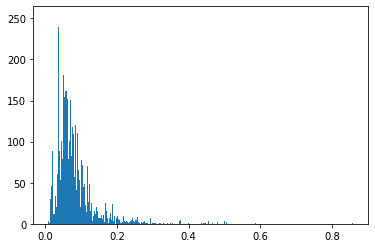

0.06917233475992222

In [12]:
plt.hist(nonZero, bins=500)
plt.show()
m

In [13]:
m = 0.1
dataset = list()
for i in range(len(features)):
    temp = textFrame.columns.values[tuple([textFrame.iloc[i] >= m])]  #有tuple error
    dataset.append(temp.tolist())

In [14]:
for i in range(len(features)):
    print(dataset[i])

['588', '706', '一個', '一場', '一舉', '一路上', '傳統', '優勢', '創立僅', '勇氣', '卓越', '受到', '大選中', '寧靜', '席進', '得票率', '志工', '成功', '捷徑', '推動', '改變', '政治', '文化', '本次', '汗水', '沒有', '淚水', '深知', '深重', '準檢視', '眾人', '精彩', '興政黨', '若要', '軍國會', '送入', '這場', '革命', '高標']
['上線', '大家', '如何', '覺得', '黨徽']
['158', '上工', '不會成', '主動', '人賴', '今日', '任黨團', '其祿', '協商', '各黨', '嗡嗡', '嗡開始', '回到', '將以', '張其祿', '承諾', '擔任', '擔綱', '民眾', '法案', '由賴', '確定', '總召', '總召出', '總召張', '總召賴', '肩上', '自己', '萬餘', '選舉', '重擔', '開始', '革命', '香伶', '香伶擔', '黨團', '黨會']
['一步', '世界', '以台灣', '共融', '台北市', '台灣', '台灣民眾', '國際', '姊妹市', '市政府', '布拉格', '我們', '才能', '整體', '朋友', '看到']
['我們', '海選', '證明']
['人民', '作主', '兩大黨', '出門', '利益', '前一天', '哪裡', '國家', '就是', '我們', '投票', '政治', '政黨', '歸隊', '民主', '真正', '選前', '還記', '革命']
['台灣民眾', '大家鼠', '所鼠', '抹紅', '民眾', '眾望', '自己', '行大運', '這次', '鼠年']
['之力', '例為', '保護', '保護別', '個案', '出現', '助人', '口罩', '各位', '就是', '就醫', '才能', '此外', '武漢', '消毒', '狀況', '疫情', '確診', '肺炎', '自助', '自己', '衛生', '資訊', '防疫']
['一個', '不是', '人民', '價值', '利益', '可以', '台灣',

### apriori 關聯圖

In [15]:
# Apriori: https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
graph = df.T
graph.columns = mergeData['Post_Date']

In [16]:
graph.tail()

Post_Date,2020-01-11,2020-01-30,2020-01-13,2020-01-15,2019-11-19,2020-01-10,2020-01-23,2020-01-30,2019-08-06,2020-01-11,...,2019-12-21,2020-01-31,2020-01-10,2020-01-10,2019-07-15,2020-01-09,2019-08-04,2019-09-21,2019-12-11,2019-12-23
黨會,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
黨過,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
黨黨,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
鼓勵,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
鼠年,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

minsup = 0.001
apriori(graph, min_support = minsup, use_colnames=True)

,support,itemsets
0,0.035199,(2020-01-11 00:00:00)
1,0.004513,(2020-01-30 00:00:00)
2,0.033394,(2020-01-13 00:00:00)
3,0.014440,(2020-01-15 00:00:00)
4,0.002708,(2019-11-19 00:00:00)
...,...,...
413,0.001805,"(2020-01-10 00:00:00, 2020-01-08 00:00:00, 202..."
414,0.001805,"(2020-01-10 00:00:00, 2020-01-08 00:00:00, 202..."
415,0.001805,"(2020-01-10 00:00:00, 2020-01-08 00:00:00, 202..."
416,0.001805,"(2020-01-10 00:00:00, 2020-01-08 00:00:00, 201..."


In [18]:
result = apriori(graph, min_support = minsup)
result

,support,itemsets
0,0.035199,(0)
1,0.004513,(1)
2,0.033394,(2)
3,0.014440,(3)
4,0.002708,(4)
...,...,...
413,0.001805,"(34, 38, 41, 52, 31)"
414,0.001805,"(32, 38, 41, 52, 53)"
415,0.001805,"(32, 38, 41, 52, 55)"
416,0.001805,"(33, 38, 41, 46, 52)"


In [19]:
rules = association_rules(result, metric="confidence", min_threshold=0.0)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(0),(5),0.035199,0.017148,0.001805,0.051282,2.990553,0.001201,1.035979
1,(5),(0),0.017148,0.035199,0.001805,0.105263,2.990553,0.001201,1.078307
2,(0),(8),0.035199,0.017148,0.002708,0.076923,4.485830,0.002104,1.064756
3,(8),(0),0.017148,0.035199,0.002708,0.157895,4.485830,0.002104,1.145702
4,(0),(21),0.035199,0.014440,0.002708,0.076923,5.326923,0.002199,1.067690


In [20]:
rules = association_rules(result, metric="lift", min_threshold=1.2)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(0),(5),0.035199,0.017148,0.001805,0.051282,2.990553,0.001201,1.035979
1,(5),(0),0.017148,0.035199,0.001805,0.105263,2.990553,0.001201,1.078307
2,(0),(8),0.035199,0.017148,0.002708,0.076923,4.485830,0.002104,1.064756
3,(8),(0),0.017148,0.035199,0.002708,0.157895,4.485830,0.002104,1.145702
4,(0),(21),0.035199,0.014440,0.002708,0.076923,5.326923,0.002199,1.067690


In [21]:
rules["antecedant_len"] = rules["antecedents"].apply(lambda x: len(x))
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedant_len
0,(0),(5),0.035199,0.017148,0.001805,0.051282,2.990553,0.001201,1.035979,1
1,(5),(0),0.017148,0.035199,0.001805,0.105263,2.990553,0.001201,1.078307,1
2,(0),(8),0.035199,0.017148,0.002708,0.076923,4.485830,0.002104,1.064756,1
3,(8),(0),0.017148,0.035199,0.002708,0.157895,4.485830,0.002104,1.145702,1
4,(0),(21),0.035199,0.014440,0.002708,0.076923,5.326923,0.002199,1.067690,1


In [22]:
out = rules[ (rules['antecedant_len'] >= 2) &
       (rules['confidence'] > 0.75) &
       (rules['lift'] > 1.2) ]
out.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedant_len
330,"(1, 26)",(19),0.001805,0.004513,0.001805,1.0,221.600000,0.001797,inf,2
332,"(26, 19)",(1),0.001805,0.004513,0.001805,1.0,221.600000,0.001797,inf,2
337,"(8, 3)",(18),0.001805,0.016245,0.001805,1.0,61.555556,0.001776,inf,2
342,"(8, 3)",(23),0.001805,0.016245,0.001805,1.0,61.555556,0.001776,inf,2
344,"(3, 23)",(8),0.001805,0.017148,0.001805,1.0,58.315789,0.001774,inf,2


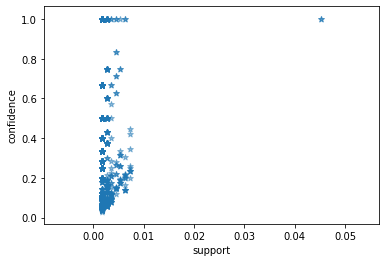

In [23]:
support = rules['support']
confidence = rules['confidence']
plt.scatter(support, confidence, alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [24]:
len(rules)
rules['antecedents'].head()

0    (0)
1    (5)
2    (0)
3    (8)
4    (0)
Name: antecedents, dtype: object

In [25]:
import networkx as nx
G = nx.DiGraph()
for i in range(len(mergeData)):
    G.add_node(i)
for i in range(len(rules['antecedents'])):
    currentFrom = list(rules['antecedents'][i])
    currentTo = list(rules['consequents'][i])
    for j in range(len(currentFrom)):
        G.add_edge(currentFrom[j], currentTo[0])

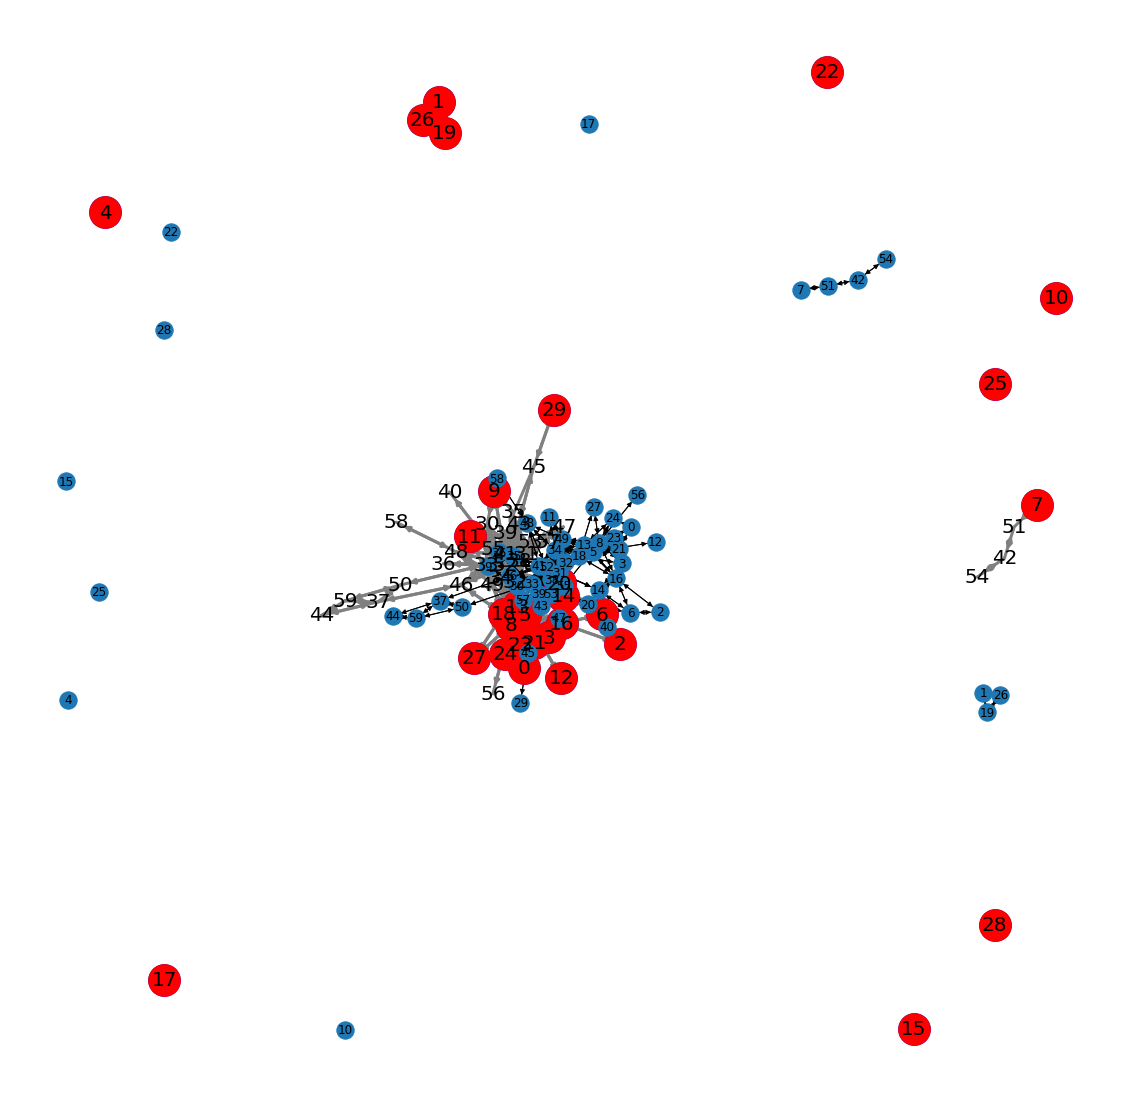

In [26]:
nodeListA = mergeData.index[mergeData['df_class'] == 'white'].tolist()
nodeListB = mergeData.index[mergeData['df_class'] == 'green'].tolist()
plt.figure(figsize=(20,20))

# positions for all nodes
pos = nx.spring_layout(G)

# nodes
nx.draw_networkx_nodes(G, pos, nodelist=nodeListA,node_color="blue", node_size=1000)
nx.draw_networkx_nodes(G, pos, nodelist=nodeListB,node_color="red",node_size=1000)
nx.draw_networkx_edges(G, pos, width=3,edge_color='gray')

# labels
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')
nx.draw(G, with_labels=True)

plt.axis('off')
plt.savefig("img/weighted_graph.png") # save as png

plt.show() # display